In [71]:
import numpy as np
import pandas as pd
import math
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2', font_scale=1.3)

In [55]:
data = pd.read_csv('sex_bmi_smokers.csv')
data

,sex,bmi,smoker
0,female,27.900,yes
1,male,33.770,no
2,male,33.000,no
3,male,22.705,no
4,male,28.880,no
...,...,...,...
1333,male,30.970,no
1334,female,31.920,no
1335,female,36.850,no
1336,female,25.800,no


In [56]:
data.groupby(['sex', 'smoker']).count()

bmi
sex    smoker     
female no      547
       yes     115
male   no      517
       yes     159

курящих мужчин 159, некурящих женщин 547

In [57]:
def sample_mean(X):
    return round(X.sum() / len(X), 2)

In [58]:
def sample_covariance(X, sm):
    return round(((X - sm) ** 2).sum() / len(X), 2)

In [59]:
((data['bmi'] - sample_mean(data['bmi'])) ** 2).sum() / len(data)

37.16010151345292

In [60]:
sm1 = sample_mean(data['bmi'])
sm1

30.66

In [74]:
def quantile1(X, q):
    return round(X.quantile(q), 2)

In [75]:
def quantile2(X, q):
    '''
    X is sorted by bmi
    '''
    
    num = (len(X) * q) + 0.5 - 1  # -1 for indexing in datafraeme
    if num == int(num):
        return round(X.iloc[num], 2)
    else:
        x = X.iloc[math.floor(num)] + \
            (X.iloc[math.ceil(num)] - X.iloc[math.floor(num)]) * \
            (num - math.floor(num))
        return round(x, 2)

In [76]:
quantile1(data['bmi'], .6)

32.03

In [77]:
quantile2(data.sort_values('bmi')['bmi'], .6)

32.04

In [89]:
x = data['bmi']
print('all')
smx = sample_mean(x)
print(smx)
print(sample_covariance(x, smx))
print(quantile1(x, .6))

all
30.66
37.16
32.03


In [131]:
for c in data.groupby(['sex', 'smoker']):
    # print(c[1]['bmi'])
    x = c[1]['bmi']
    print(c[0])
    smx = sample_mean(x)
    print(smx)
    print(sample_covariance(x, smx))
    print(quantile1(x, .6))
    print()

('female', 'no')
30.54
34.77
31.91

('female', 'yes')
29.61
44.02
30.88

('male', 'no')
30.77
38.27
32.11

('male', 'yes')
31.5
35.2
33.24



/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

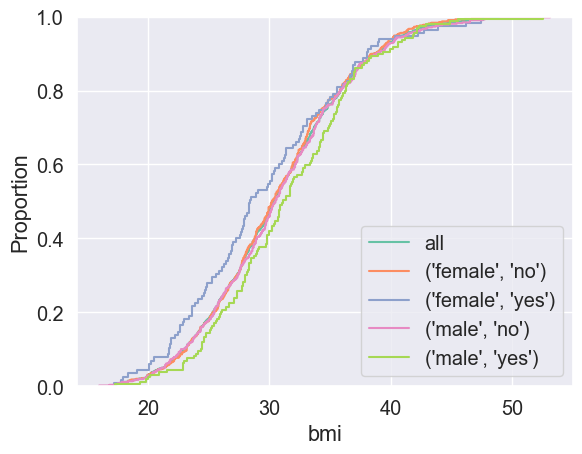

In [101]:
fig, ax = plt.subplots()
cmap = sns.color_palette("Blues", n_colors=5)
legends = ['all']
sns.ecdfplot(data=data, x='bmi', ax=ax)
for c in data.groupby(['sex', 'smoker']):
    x = c[1]
    sns.ecdfplot(data=x, x='bmi', ax=ax)
    legends += [c[0]]
ax.legend(legends)

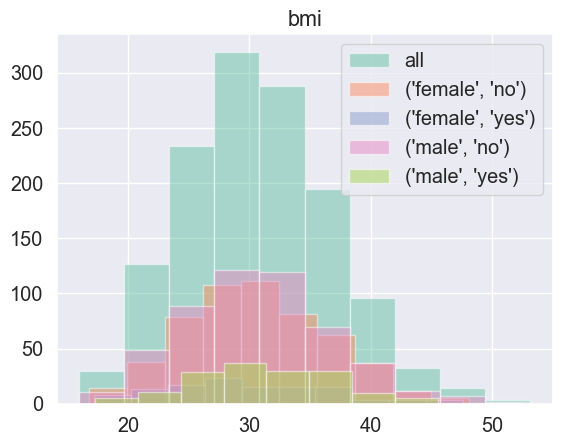

In [106]:
fig, ax = plt.subplots()
cmap = sns.color_palette("Blues", n_colors=5)
legends = ['all']
data['bmi'].hist(ax=ax, alpha=0.5)
for c in data.groupby(['sex', 'smoker']):
    x = c[1]
    x.hist(ax=ax, alpha=0.5)
    legends += [c[0]]
ax.legend(legends)

/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

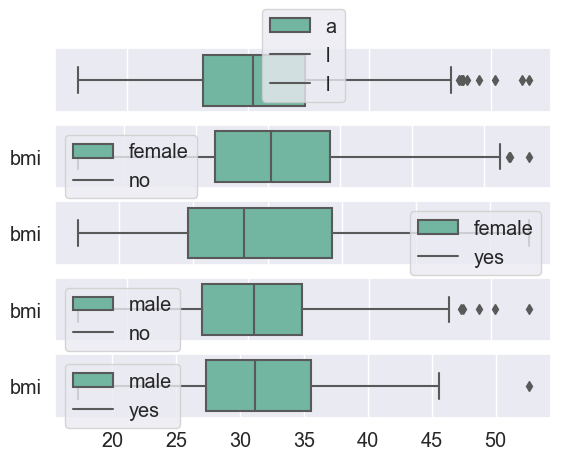

In [122]:

fig, ax = plt.subplots(nrows=5)
cmap = sns.color_palette("Blues", n_colors=5)
legends = ['all']
sns.boxplot(x=data["bmi"], ax=ax[0])
ax[0].legend('all')
for i, c in enumerate(data.groupby(['sex', 'smoker'])):
    x = c[1]
    sns.boxplot(x, ax=ax[i + 1], orient='h')
    ax[i+1].legend(c[0])
    # legends += [c[0]]
# ax.legend(legends)